In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Datasets\Spotify Dataset\SpotifyFeatures.csv")

In [3]:
print(data) #0,1,2,3,-2

        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0

In [4]:
data = data.drop(columns = ['genre','artist_name','track_name','track_id'])

In [6]:
data = data.drop(columns = ['time_signature'])

In [7]:
print(data)

        popularity  acousticness  danceability  duration_ms  energy  \
0                0       0.61100         0.389        99373   0.910   
1                1       0.24600         0.590       137373   0.737   
2                3       0.95200         0.663       170267   0.131   
3                0       0.70300         0.240       152427   0.326   
4                4       0.95000         0.331        82625   0.225   
...            ...           ...           ...          ...     ...   
232720          39       0.00384         0.687       326240   0.714   
232721          38       0.03290         0.785       282447   0.683   
232722          47       0.90100         0.517       166960   0.419   
232723          44       0.26200         0.745       222442   0.704   
232724          35       0.09730         0.758       323027   0.470   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0               0.000000  C#    0.3460    -1.828  Major       0.05

In [8]:
print(set(data['mode']))

{'Major', 'Minor'}


In [9]:
data.loc[data['mode'] == 'Major','mode'] = 1
data.loc[data['mode'] == 'Minor','mode'] = 0

In [10]:
print(data)

        popularity  acousticness  danceability  duration_ms  energy  \
0                0       0.61100         0.389        99373   0.910   
1                1       0.24600         0.590       137373   0.737   
2                3       0.95200         0.663       170267   0.131   
3                0       0.70300         0.240       152427   0.326   
4                4       0.95000         0.331        82625   0.225   
...            ...           ...           ...          ...     ...   
232720          39       0.00384         0.687       326240   0.714   
232721          38       0.03290         0.785       282447   0.683   
232722          47       0.90100         0.517       166960   0.419   
232723          44       0.26200         0.745       222442   0.704   
232724          35       0.09730         0.758       323027   0.470   

        instrumentalness key  liveness  loudness mode  speechiness    tempo  \
0               0.000000  C#    0.3460    -1.828    1       0.0525  

In [11]:
print(set(data['key']))

{'F', 'C#', 'D#', 'D', 'A', 'F#', 'B', 'G', 'C', 'G#', 'A#', 'E'}


In [13]:
data.loc[data['key'] == 'A','key'] = 0
data.loc[data['key'] == 'A#','key'] = 1
data.loc[data['key'] == 'B','key'] = 2
data.loc[data['key'] == 'C','key'] = 3
data.loc[data['key'] == 'C#','key'] = 4
data.loc[data['key'] == 'D','key'] = 5

data.loc[data['key'] == 'D#','key'] = 6
data.loc[data['key'] == 'E','key'] = 7
data.loc[data['key'] == 'F','key'] = 8
data.loc[data['key'] == 'F#','key'] = 9
data.loc[data['key'] == 'G','key'] = 10
data.loc[data['key'] == 'G#','key'] = 11

In [14]:
print(set(data['key']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [16]:
k_means = KMeans(3)

In [17]:
x = data

In [18]:
k_means.fit(x)

KMeans(n_clusters=3)

In [20]:
identified_clusters = k_means.fit_predict(x)

In [21]:
print(identified_clusters)

[0 0 0 ... 0 0 1]


In [22]:
data_clusters = data.copy()
data_clusters['clusters'] = identified_clusters 

In [23]:
print(data_clusters)

        popularity  acousticness  danceability  duration_ms  energy  \
0                0       0.61100         0.389        99373   0.910   
1                1       0.24600         0.590       137373   0.737   
2                3       0.95200         0.663       170267   0.131   
3                0       0.70300         0.240       152427   0.326   
4                4       0.95000         0.331        82625   0.225   
...            ...           ...           ...          ...     ...   
232720          39       0.00384         0.687       326240   0.714   
232721          38       0.03290         0.785       282447   0.683   
232722          47       0.90100         0.517       166960   0.419   
232723          44       0.26200         0.745       222442   0.704   
232724          35       0.09730         0.758       323027   0.470   

        instrumentalness key  liveness  loudness mode  speechiness    tempo  \
0               0.000000   4    0.3460    -1.828    1       0.0525  

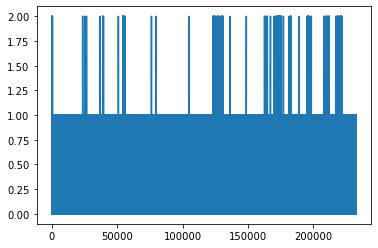

In [24]:
plt.plot(data_clusters['clusters'])

In [26]:
print(set(data_clusters['clusters']))

{0, 1, 2}
